In [43]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch

In [44]:
data_dir = '/Users/noreen/aipnd-project/flowers'
test_dir = data_dir + '/test'

Show Image

In [45]:
def get_new_dim(width, height, min_length=256):
    percent_scale =  min_length / min(width, height) 
    new_width = round(percent_scale * width)
    new_height = round(percent_scale * height)
    
    return new_width, new_height
    
def thumb_image(image):
    
    im = Image.open(image)
    orig_width, orig_height = im.size
    new_width, new_height = get_new_dim(orig_width, orig_height)
    
    newsize = (new_width, new_height)
    im.thumbnail(newsize)
    left = round((new_width - 224)/6)

    top = round((new_height - 224)/6)
    right = left + 224
    bottom = top + 224
    cropped = im.crop((left, top, right, bottom)) 
#     cropped.show()
    return cropped

In [46]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # TODO: Process a PIL image for use in a PyTorch model

    cropped = thumb_image(image)
    
    np_image = np.array(cropped)

    np_image = np.array(np_image) / 255
    
    # normalize
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std
                
    np_image = np_image.transpose((2, 0, 1))        
    
    final_image = torch.from_numpy(np_image)
    return final_image

In [91]:

def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
        plt.axis('off')
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    plt.title(title)
    ax.imshow(image)
    
    return ax

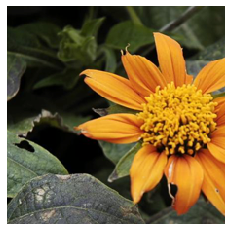

In [48]:
img_filename = test_dir + '/59/image_05052.jpg'
image = process_image(img_filename)       
imshow(image)

Show Plot

In [58]:
def show_prediction_plot(predictions, probabilities):
    y_pos = [0, 1, 2, 3, 4]
    plt.figure(figsize=(4,4))
    # Create horizontal bars
    plt.barh(y_pos, probabilities)

    # Create names on the y-axis
    plt.yticks(y_pos, predictions)
    # Show graphic
    plt.show()

In [93]:
def show_prediction(img_filename, predictions, probabilities):
    
    image = process_image(img_filename)       
    imshow(image, None, predictions[0])
    
    show_prediction_plot(predictions, probabilities)

Show Image and Plot

In [51]:
import json

with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

In [52]:
class_to_idx = {'1': 0,
 '10': 1,
 '100': 2,
 '101': 3,
 '102': 4,
 '11': 5,
 '12': 6,
 '13': 7,
 '14': 8,
 '15': 9,
 '16': 10,
 '17': 11,
 '18': 12,
 '19': 13,
 '2': 14,
 '20': 15,
 '21': 16,
 '22': 17,
 '23': 18,
 '24': 19,
 '25': 20,
 '26': 21,
 '27': 22,
 '28': 23,
 '29': 24,
 '3': 25,
 '30': 26,
 '31': 27,
 '32': 28,
 '33': 29,
 '34': 30,
 '35': 31,
 '36': 32,
 '37': 33,
 '38': 34,
 '39': 35,
 '4': 36,
 '40': 37,
 '41': 38,
 '42': 39,
 '43': 40,
 '44': 41,
 '45': 42,
 '46': 43,
 '47': 44,
 '48': 45,
 '49': 46,
 '5': 47,
 '50': 48,
 '51': 49,
 '52': 50,
 '53': 51,
 '54': 52,
 '55': 53,
 '56': 54,
 '57': 55,
 '58': 56,
 '59': 57,
 '6': 58,
 '60': 59,
 '61': 60,
 '62': 61,
 '63': 62,
 '64': 63,
 '65': 64,
 '66': 65,
 '67': 66,
 '68': 67,
 '69': 68,
 '7': 69,
 '70': 70,
 '71': 71,
 '72': 72,
 '73': 73,
 '74': 74,
 '75': 75,
 '76': 76,
 '77': 77,
 '78': 78,
 '79': 79,
 '8': 80,
 '80': 81,
 '81': 82,
 '82': 83,
 '83': 84,
 '84': 85,
 '85': 86,
 '86': 87,
 '87': 88,
 '88': 89,
 '89': 90,
 '9': 91,
 '90': 92,
 '91': 93,
 '92': 94,
 '93': 95,
 '94': 96,
 '95': 97,
 '96': 98,
 '97': 99,
 '98': 100,
 '99': 101}


In [53]:
idx_to_class = { value : key for (key, value) in class_to_idx.items() }

In [54]:
def get_flower_name(idx_to_class, cat_to_name, predicted_cat):
    return cat_to_name[idx_to_class[predicted_cat]]

In [55]:
def convert_preds_to_flowernames(preds):    
    flowers = []    
    for pr in preds:
        predicted_flower_name = get_flower_name(idx_to_class, cat_to_name, pr)
        flowers.append(predicted_flower_name)
        
    return flowers

In [79]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: block;
    text-align: right;
    vertical-align: top;
    margin-right: 36%;
}
</style>
""")

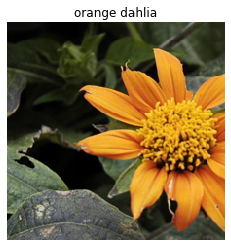

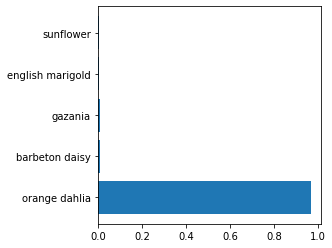

In [94]:
filename = test_dir + '/59/image_05052.jpg'

prob = [ 0.9669,  0.0098,  0.0096,  0.0039,  0.0039 ]
pred = [ 57,  38,  71,  47,  52 ]
flower_predictions = convert_preds_to_flowernames(pred)

show_prediction(filename, flower_predictions, prob)